## 다양한 피처선정 방법으로 피처 선택하기
- 상관관계 높았던 Top 10개 기준으로 차원 축소(Wrapper 방식) 진행

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
# 파일 경로 설정
file_path = "data.csv"

# CSV 파일을 DataFrame으로 불러오기
data = pd.read_csv(file_path)

- 상관관계 높았던 10개 사용

In [3]:
selected_features = [
    'Bankrupt?',
    ' Net Income to Total Assets',
    ' ROA(A) before interest and % after tax',
    ' ROA(B) before interest and depreciation after tax',
    ' ROA(C) before interest and depreciation before interest',
    ' Net worth/Assets',
    ' Debt ratio %',
    ' Persistent EPS in the Last Four Seasons',
    ' Retained Earnings to Total Assets',
    ' Net profit before tax/Paid-in capital'
]

In [4]:
# 독립변수 종속변수 정리
X = data[selected_features]
y= data['Bankrupt?']

In [5]:
X

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital
0,1,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036
3,1,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461
...,...,...,...,...,...,...,...,...,...,...
6814,0,0.799927,0.539468,0.543230,0.493687,0.875382,0.124618,0.216602,0.925611,0.171111
6815,0,0.799748,0.538269,0.524172,0.475162,0.900747,0.099253,0.216697,0.932629,0.171805
6816,0,0.797778,0.533744,0.520638,0.472725,0.961061,0.038939,0.210929,0.932000,0.172287
6817,0,0.811808,0.559911,0.554045,0.506264,0.913021,0.086979,0.228326,0.939613,0.182498


## 차원축소 기법(Feature Selection): Wrapper
- 전진 선택(Forward selection)
- 후진 제거(Backward elimination)
- Stepwise selection

sfs_forward 선택된 특성
('Bankrupt?',)
sfs_backward 선택된 특성
('Bankrupt?', ' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital')
sfs_stepwise 선택된 특성
('Bankrupt?',)


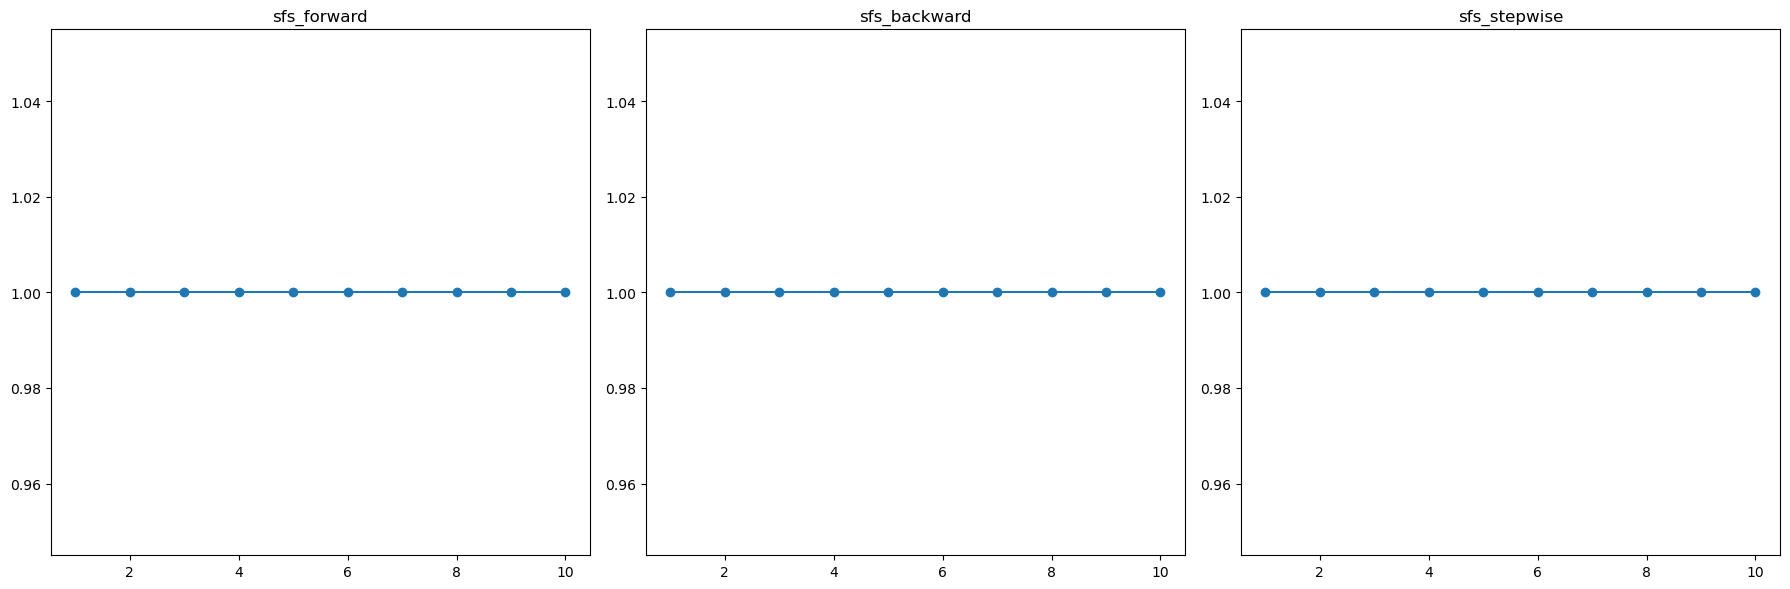

In [6]:
# 훈련 데이터셋으로 분할

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=111)

# 로지스틱회귀모델 가지고오기
model=LogisticRegression(max_iter=200)


# 각선택법을 가지고 오는 방법
# SFS(모델, 피처선정 어떻게 할건지? best 기타 등등, forward , floating , scoring, cv)
sfs_forward=SFS(model, k_features= 'best', forward= True, floating=False, scoring='accuracy', cv=3)
sfs_backward=SFS(model, k_features= 'best', forward= False, floating=False, scoring='accuracy', cv=3)
sfs_stepwise=SFS(model, k_features= 'best', forward= True, floating=True, scoring='accuracy', cv=3)

# 각 방법을 3개 모두 다 학습 간단하게 fit
sfs_forward =sfs_forward.fit(X_train, y_train)
sfs_backward =sfs_backward.fit(X_train, y_train)
sfs_stepwise =sfs_stepwise.fit(X_train, y_train)

#선택된 특성 출력
#어떤 피처들이 선정되는지?
print('sfs_forward 선택된 특성')
print(sfs_forward.k_feature_names_)


print('sfs_backward 선택된 특성')
print(sfs_backward.k_feature_names_)


print('sfs_stepwise 선택된 특성')
print(sfs_stepwise.k_feature_names_)


#시각화로 실제 어떤 식으로 변화하는지 체크해 보자!
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward.subsets_)+1),[sfs_forward.subsets_[i]['avg_score'] for i in sfs_forward.subsets_], marker='o')
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward.subsets_)+1),[sfs_backward.subsets_[i]['avg_score'] for i in sfs_backward.subsets_], marker='o')
ax[1].set_title('sfs_backward')

ax[2].plot(range(1, len(sfs_stepwise.subsets_)+1),[sfs_stepwise.subsets_[i]['avg_score'] for i in sfs_stepwise.subsets_], marker='o')
ax[2].set_title('sfs_stepwise')

plt.tight_layout()
plt.show()

## RFE, RFECV
<b> RFE </b> : 반복적으로 훈련시키고, 가장 중요도가 낮은 특성을 하나씩 제거하는 방식, 몇 개 제거할지 등을 지정할 수 있다.


- RFE

In [7]:
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# RandomForest 모델
model_rf = RandomForestClassifier(n_estimators=100, random_state=111)

# RFE 모델 생성 및 학습
selector_rf = RFE(estimator=model_rf, n_features_to_select=10)
selector_rf = selector_rf.fit(X, y)

# 선택된 특성
selected_features_rf = [X.columns[i] for i in range(len(selector_rf.support_)) if selector_rf.support_[i]]
print('RandomForest RFE 선택된 특성:', selected_features_rf)

RandomForest RFE 선택된 특성: [' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Cash/Total Assets', ' Working Capital/Equity', " Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)']


- RFECV

<b> RFECV </b>: 확장된 버전 -> 교차검증 통해 최적의 특성 수를 자동으로 결정, 반복에서 특성 제거하면서 교차검증으로 수행하여 모델 평가 -> 특성 수 찾기

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [10]:
model= RandomForestClassifier()
cv= StratifiedKFold(3)

In [11]:
#RFECV 모델 만들기
selector =RFECV(estimator=model, step=1, cv=cv)
selector=selector.fit(X,y)

In [12]:
# 최적의 특성 수 , 선택된 특성 출력

print('최적의 피처 수 ', selector.n_features_)
print('최적의 피처 수 ', selector.support_)

최적의 피처 수  33
최적의 피처 수  [ True False False False False False False False  True False  True False
 False  True False  True  True  True  True False False False  True False
 False False False False False  True False False False  True  True  True
  True  True False  True False False  True False False False  True False
  True False False  True False  True False False  True False  True False
 False  True False False  True False False False  True False False False
 False False False False False False False False False False False False
 False  True  True  True False  True False  True  True False  True]


In [13]:
# 선택된 Feature 이름 출력
selected_features = [name for name, support in zip(data, selector.support_) if support]

print('선택된 Feature:', selected_features)
print(selected_features.counts)

선택된 Feature: ['Bankrupt?', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Operating profit/Paid-in capital', ' Accounts Receivable Turnover', ' Inventory Turnover Rate (times)', ' Revenue per person', ' Allocation rate per person', ' Current Assets/Total Assets', ' Quick Assets/Current Liability', ' Operating Funds to Liability', ' Current Liabilities/Liability', ' Retained Earnings to Total Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' Gross Profit to Sales', ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Net Income Flag']


AttributeError: 'list' object has no attribute 'counts'

## 중간 정리
- <b> 상관관계로 선택된 Feature:  </b>
'Bankrupt?', ' Net Income to Total Assets', ' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets',
' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital'

- <b> RFE로 선택된 Feature: </b>
' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Cash/Total Assets', ' Working Capital/Equity', " Net Income to Stockholder's Equity", ' Degree of Financial Leverage (DFL)'
    
- <b> RFECV 로 선택된 Feature: </b>
'Bankrupt?', ' ROA(A) before interest and % after tax', ' Operating Profit Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Operating profit/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per person', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Operating Funds to Liability', ' Current Liabilities/Liability', ' Retained Earnings to Total Assets', ' Cash Flow to Total Assets', ' Cash Flow to Equity', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' No-credit Interval', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Net Income Flag'

In [ ]:
# 상관관계로 선택된 Feature
correlation_features = {'Bankrupt?', 'Net Income to Total Assets', 'ROA(A) before interest and % after tax', 
                        'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 
                        'Net worth/Assets', 'Debt ratio %', 'Persistent EPS in the Last Four Seasons', 
                        'Retained Earnings to Total Assets', 'Net profit before tax/Paid-in capital'}

# RFE로 선택된 Feature
rfe_features = {'Persistent EPS in the Last Four Seasons', 'Net Value Growth Rate', 'Interest Expense Ratio', 
                'Total debt/Total net worth', 'Borrowing dependency', 'Net profit before tax/Paid-in capital', 
                'Cash/Total Assets', 'Working Capital/Equity', 'Net Income to Stockholder\'s Equity', 
                'Degree of Financial Leverage (DFL)'}

# RFECV로 선택된 Feature
rfecv_features = {'Bankrupt?', 'ROA(A) before interest and % after tax', 'Operating Profit Rate', 
                  'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 
                  'Continuous interest rate (after tax)', 'Cash flow rate', 'Tax rate (A)', 
                  'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 
                  'Operating Profit Per Share (Yuan ¥)', 'Total Asset Growth Rate', 'Current Ratio', 
                  'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Debt ratio %', 
                  'Long-term fund suitability ratio (A)', 'Operating profit/Paid-in capital', 
                  'Total Asset Turnover', 'Accounts Receivable Turnover', 'Average Collection Days', 
                  'Inventory Turnover Rate (times)', 'Net Worth Turnover Rate (times)', 'Revenue per person', 
                  'Operating profit per person', 'Allocation rate per person', 'Current Assets/Total Assets', 
                  'Cash/Total Assets', 'Quick Assets/Current Liability', 'Operating Funds to Liability', 
                  'Current Liabilities/Liability', 'Retained Earnings to Total Assets', 'Cash Flow to Total Assets', 
                  'Cash Flow to Equity', 'Liability-Assets Flag', 'Net Income to Total Assets', 
                  'Total assets to GNP price', 'No-credit Interval', 'Gross Profit to Sales', 
                  'Net Income to Stockholder\'s Equity', 'Liability to Equity', 'Degree of Financial Leverage (DFL)', 
                  'Net Income Flag'}

# 세 방법 모두에서 선택된 Feature 찾기
common_features = correlation_features & rfe_features & rfecv_features

# 두 방법에서 겹치는 Feature 찾기
correlation_rfe_common = correlation_features & rfe_features
correlation_rfecv_common = correlation_features & rfecv_features
rfe_rfecv_common = rfe_features & rfecv_features

# 결과 출력
print('세 방법 모두에서 선택된 Feature:', common_features)
print('상관관계와 RFE에서 선택된 Feature:', correlation_rfe_common)
print('상관관계와 RFECV에서 선택된 Feature:', correlation_rfecv_common)
print('RFE와 RFECV에서 선택된 Feature:', rfe_rfecv_common)

select_feture = correlation_rfe_common | correlation_rfecv_common | rfe_rfecv_common
print('2개 이상 겹치는 Feature:', select_feture )


- <b> 2개 이상 겹치는 Feature: </b>
{'ROA(A) before interest and % after tax', 'Interest Expense Ratio', 'Net profit before tax/Paid-in capital', "Net Income to Stockholder's Equity", 'Persistent EPS in the Last Four Seasons', 'Bankrupt?', 'Total debt/Total net worth', 'Debt ratio %', 'Net Income to Total Assets', 'Degree of Financial Leverage (DFL)', 'Cash/Total Assets', 'Retained Earnings to Total Assets'}